In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [10]:
data = pd.read_csv('addhar_centers.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75089 entries, 0 to 75088
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gid     75089 non-null  int64  
 1   state   75089 non-null  object 
 2   lat     75089 non-null  float64
 3   long    75089 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ MB


In [12]:
data.head()

,gid,state,lat,long
0,4233336,Maharashtra,17.0076,74.2615
1,4233337,Tamil Nadu,10.7886,79.1310
2,4233338,Karnataka,16.1655,74.8214
3,4233339,Andhra Pradesh,16.1849,81.1353
4,4233340,Tripura,23.9967,91.9957


In [13]:
data.shape

(75089, 4)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

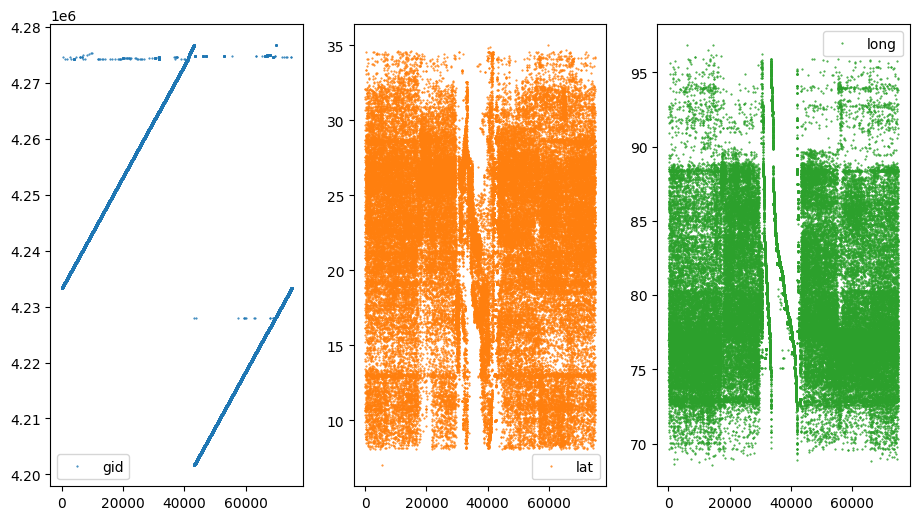

In [14]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 6), markersize=1)

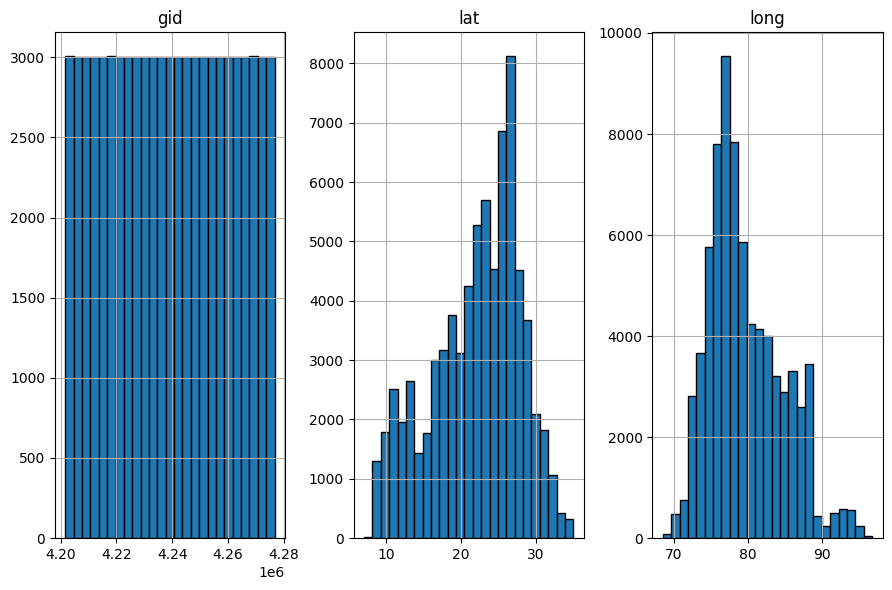

In [15]:
data.hist(bins=25, figsize=(15, 6), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

c:\Users\akash\.conda\envs\gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


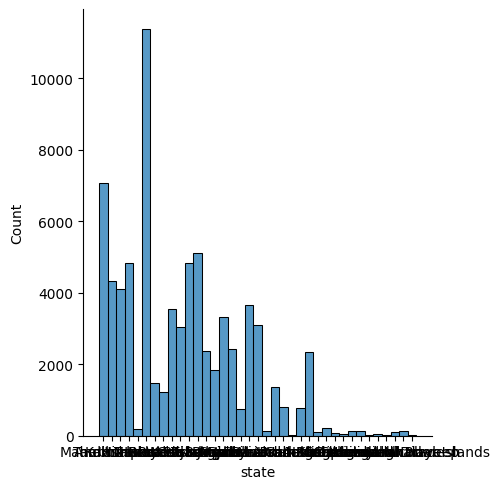

In [34]:
sns.displot(data['state'])


In [16]:
data['state'].unique()

array(['Maharashtra', 'Tamil Nadu', 'Karnataka', 'Andhra Pradesh',
       'Tripura', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Kerala', 'Odisha', 'West Bengal', 'Rajasthan', 'Telangana',
       'Punjab', 'Gujarat', 'Jharkhand', 'Delhi', 'Bihar',
       'Madhya Pradesh', 'Mizoram', 'Assam', 'Jammu and Kashmir',
       'Dadra and Nagar Haveli', 'Uttarakhand', 'Chhattisgarh', 'Goa',
       'Manipur', 'Puducherry', 'Sikkim', 'Chandigarh', 'Nagaland',
       'Daman and Diu', 'Ladakh', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Meghalaya', 'Lakshadweep'], dtype=object)

c:\Users\akash\.conda\envs\gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


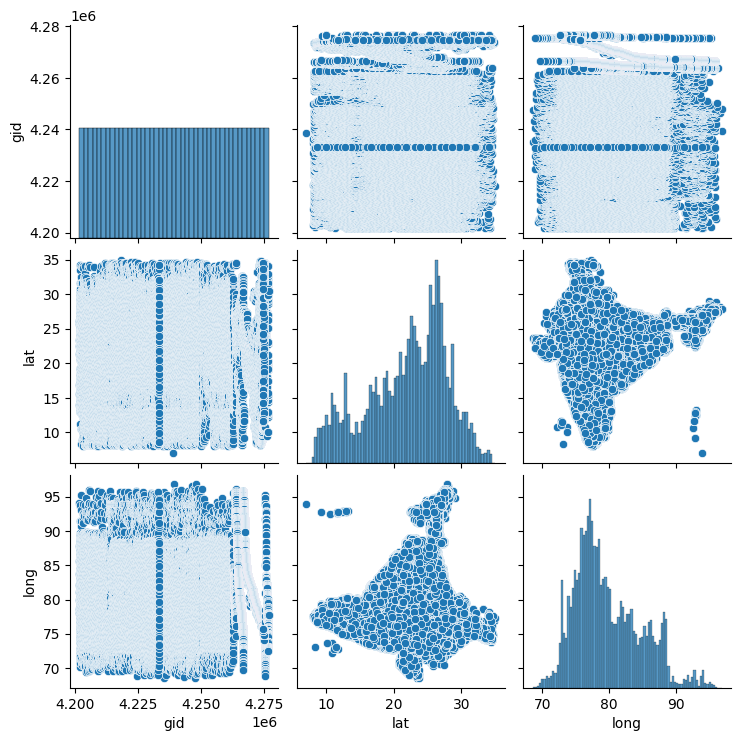

In [18]:
sns.pairplot(data)

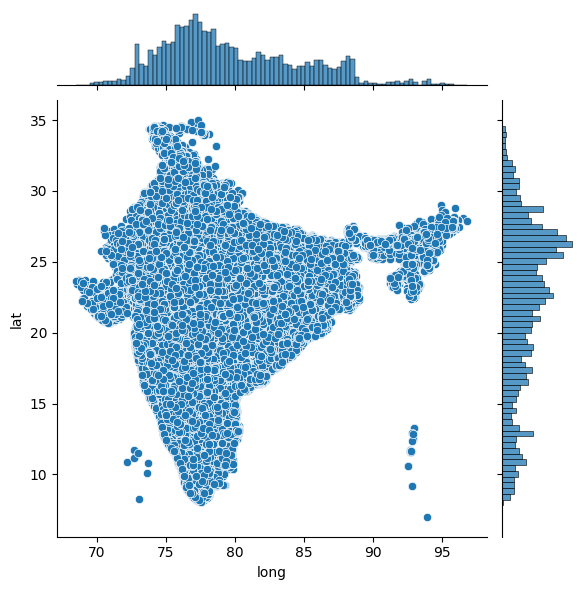

In [20]:
sns.jointplot(x='long',y='lat',data=data)

In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_file(output_file='data.html')

C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\akash\.conda\envs\gpu\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\akash\AppData\Local\Temp\ipykernel_24400\1100179185.py:1: DeprecationWarning: `import pandas_profiling` is going to 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [23]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry = geometry)

(7.0045, 34.9946)

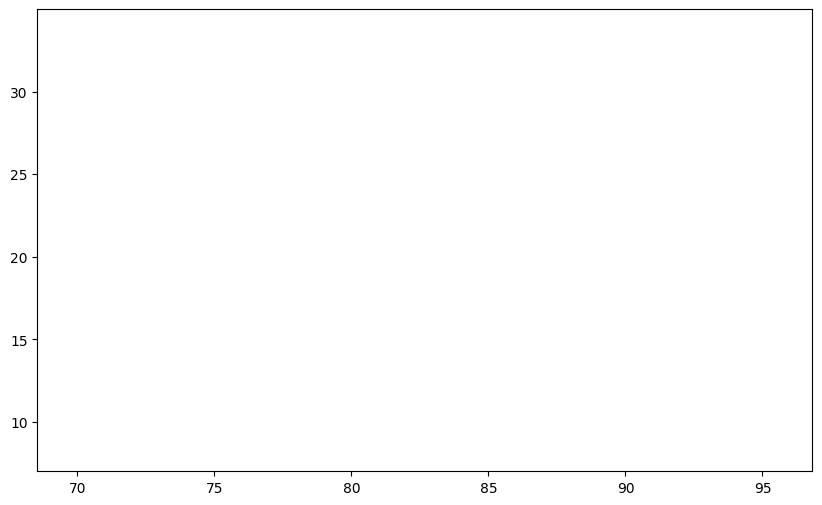

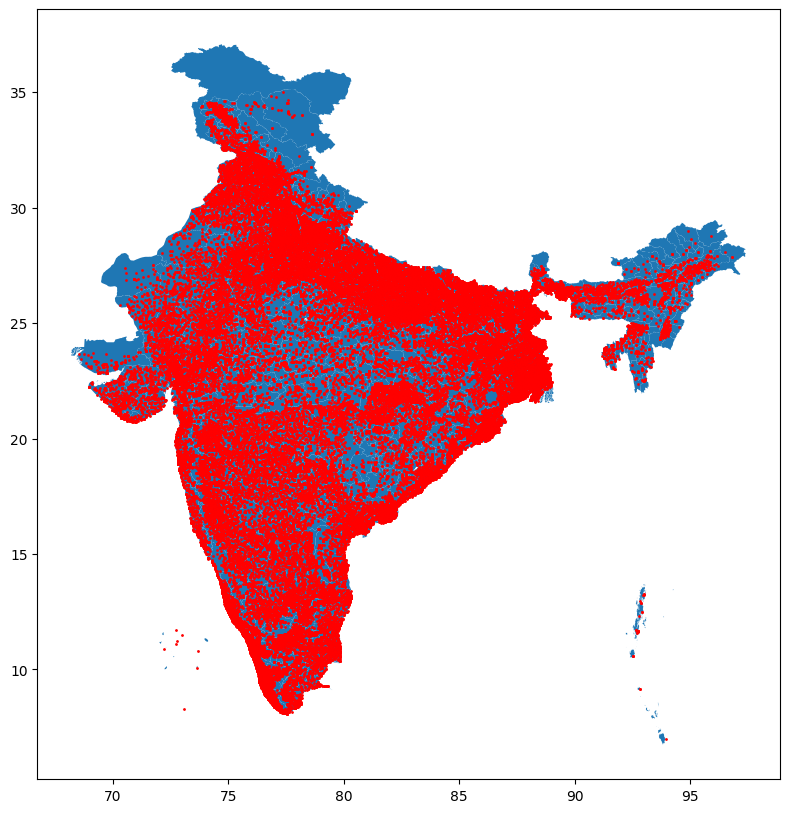

In [24]:
fig, ax = plt.subplots(figsize = (10,6))
world = gpd.read_file('india_district_boundary.shp')
gdf.plot(ax = world.plot(figsize = (10, 10)), color = 'red', markersize = 1)
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


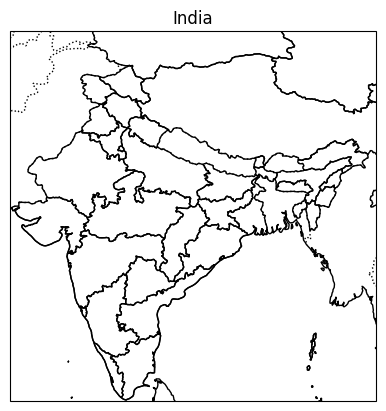

In [27]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create a map projection for India using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([68.0, 98.0, 8.0, 37.5])  # Define the latitude and longitude boundaries for India

# Draw coastlines, country boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Add a title to the map
ax.set_title('India')

# Show the map
plt.show()


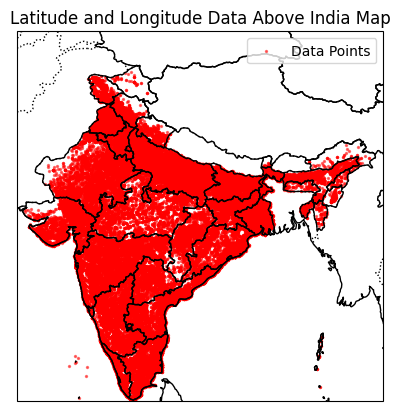

In [30]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'data' with columns 'Long' and 'Lat'

# Create a map projection for India using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([68.0, 98.0, 8.0, 37.5])  # Define the latitude and longitude boundaries for India

# Draw coastlines, country boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(data['long'], data['lat'], s=2, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Data Above India Map')
plt.legend()

# Show the plot
plt.show()


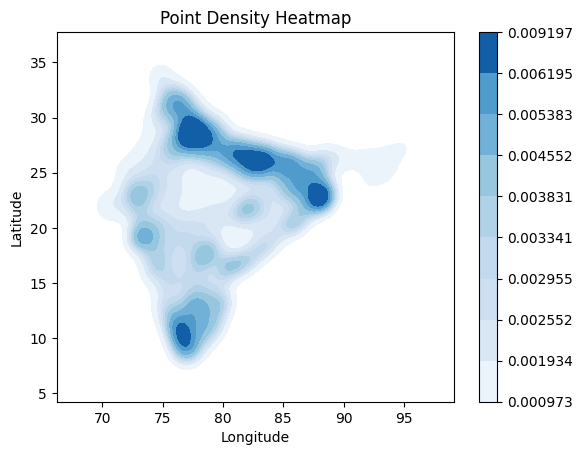

In [31]:
import seaborn as sns

# Create a heatmap of point density
sns.kdeplot(x=data['long'], y=data['lat'], cmap='Blues', fill=True, cbar=True)
plt.title('Point Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

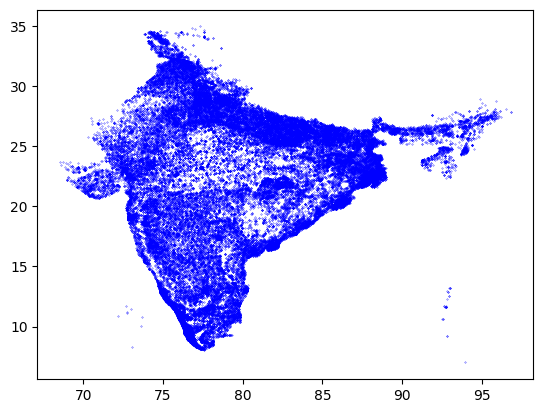

In [32]:
plt.plot(data.long, data.lat, 'b.', ms=0.5)

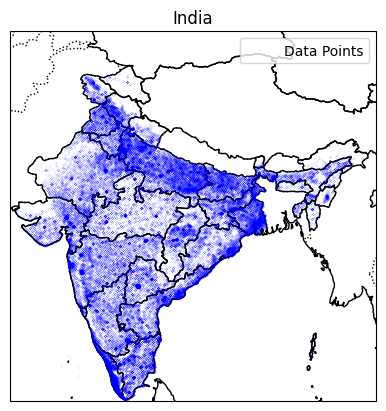

In [39]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = pd.read_csv('addhar_centers.csv')
# Create a map projection for India using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([68.0, 98.0, 8.0, 37.5])  # Define the latitude and longitude boundaries for India

# Draw coastlines, country boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
ax.plot(data['long'], data['lat'], 'b.', ms=0.1, label='Data Points')

# Add a title to the map
ax.set_title('India')

# Add legend
ax.legend()

# Show the map and the scatter plot
plt.show()


In [40]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd  # Assuming you have a DataFrame called 'data'

# Sample data (assuming you have a DataFrame called 'data')
# Each row should contain ['Lat', 'Long', 'Alert']

# Center the map at the approximate center of India
center_lat = 20.5937
center_long = 78.9629
m = folium.Map(location=[center_lat, center_long], zoom_start=5)  # Adjust the zoom level as needed

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each incident
for index, row in data.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],  # Assuming 'Lat' and 'Long' are column names in your DataFrame
        popup=row['gid'],  # Customize the popup content
    ).add_to(marker_cluster)

# Display the map
m.save('cluster_map.html')
